In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

#Introduction
In this project I will be comparing the sizes of petal lenghts and widths with the flowers examined in the data set to find the correlation between the two properties. I believe this  result will help me better undersand the uniformity, or lack there of, in the examined flowers.

In [ ]:
flowers = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/iris.csv')
flowers

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


For this project, I wanted to compare the petal length to the petal width.

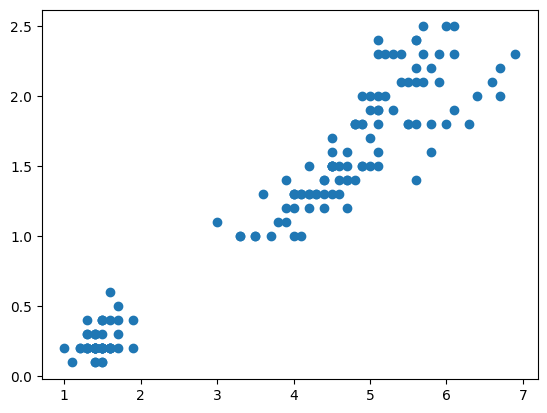

In [ ]:
plt.scatter(x=flowers.petal_length, y=flowers.petal_width)

After changing the sigma values, I decided to set both to 40, as I believed that would fit my graph the best.

In [ ]:
with pm.Model() as flowers_model:
  α = pm.Normal("α", sigma=40)
  β = pm.Normal("β", sigma=40)

  μ = pm.Deterministic("μ", α + β * flowers.petal_length)

  σ = pm.HalfNormal("σ", sigma = 10)

  y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=flowers.petal_width)

  idata_lba = pm.sample()

Output()

Output()

Text(0, 0.5, 'petal_width')

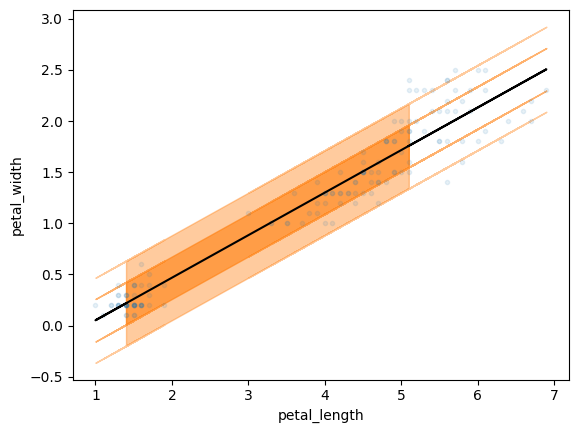

In [ ]:
_, ax = plt.subplots()

ax.plot(flowers.petal_length, flowers.petal_width, "C0.", alpha=0.1)

posterior_lba = az.extract(idata_lba)

μ_m = posterior_lba["μ"].mean("sample").values
σ_m = posterior_lba["σ"].mean("sample").values

ax.plot(flowers.petal_length, μ_m, c="k")
ax.fill_between(flowers.petal_length, μ_m + 1 * σ_m, μ_m - 1 * σ_m, alpha=0.6, color="C1")
ax.fill_between(flowers.petal_length, μ_m + 2 * σ_m, μ_m - 2 * σ_m, alpha=0.4, color="C1")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")

According to this graph, there are no petals with a length between 2 and 3.
Additionally, there is a small amount of petals with lengths between 3 and 4.

In [ ]:
pm.sample_posterior_predictive(
    idata_lba, model = flowers_model, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y_pred'>

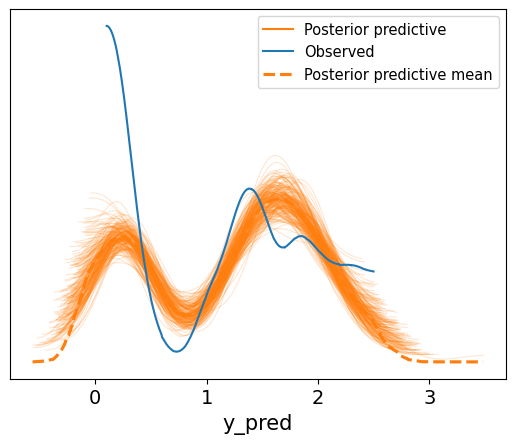

In [ ]:
az.plot_ppc(idata_lba, num_pp_samples=200, colors=["C1", "C0", "C1"])

After changing some values, I landed on this graph as I believe this fits the observed dta set better than any other combonation of values.

#Conclusion
After matching the posterior to the observed data I have come to a conclusion. I can conclude that, while length and width are linearly proportional, thete are very few petals with a length between 2 and 4.